# 1 Data Source

In [ ]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# data
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = 'ISO-8859-1')

# 2 Data Quality Analysis

#Q1 - Why does it makes sense to discretize columns for this problem?

Discretization is particuarly beneficial for decision trees models because this machine learning algorithm is designed to work with categorical data. Additionally, discretization helps in handling outliers and highly skewed variables.



#Q2 - What might be the issues (if any) if we DID NOT discretize the columns?

Overfitting: Continuous variables can have complex relationships with the target variable that decision trees may not capture

Increased computation time: Decision trees are designed to work with categorical data, and processing continuous variables can be computationally expensive.

Difficulty understanding results: Continuous variables can have complex relationships with the target variable that are difficult to interpret. Discretizing these variables can help to make the decision tree's results easier to interpret.

In [ ]:
#inspect the shape of the data
data.shape 

(48842, 11)

In [ ]:
#inspect first few rows
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
#inspect last rows
data.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [ ]:
#checking for null values?
data.isnull().sum()
# no missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Using the .info function we can determine the number of values in each column as well as the datatype
data.info()
#We can see that the only numerical column is the "y"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#descriptive statistics 
data.describe(include = 'all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
#split the train and the test data for usage
split = data['flag'].unique()
print(split)

for value in split:
    train_data = data[data['flag']== 'train']
    test_data = data[data['flag']== 'test']

['train' 'test']


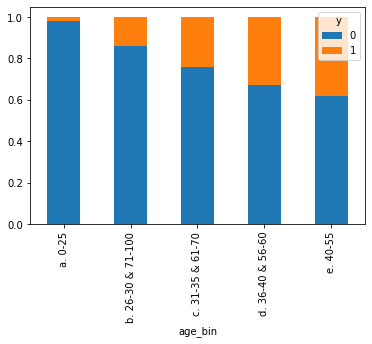

In [ ]:
#age bin viz
pd.crosstab(data['age_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

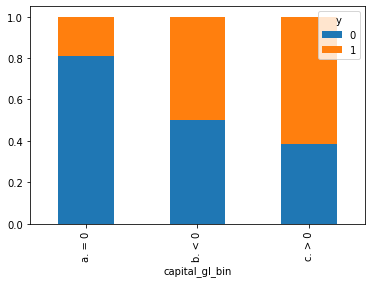

In [ ]:
#capital bin bar chart
pd.crosstab(data['capital_gl_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

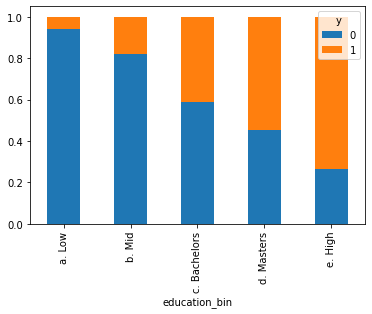

In [ ]:
#5 bins of the education 
pd.crosstab(data['education_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

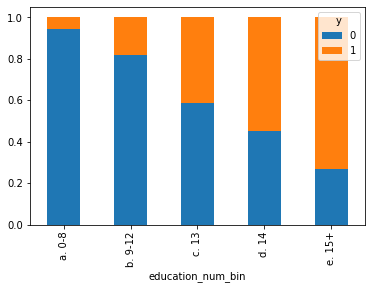

In [ ]:
#education  num
pd.crosstab(data['education_num_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

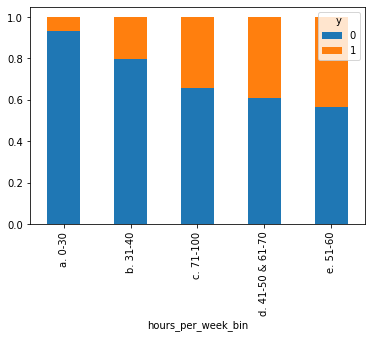

In [ ]:
#hours per week bar chart
pd.crosstab(data['hours_per_week_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

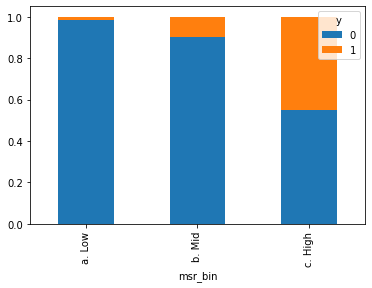

In [ ]:
#marriage/relationship status 
pd.crosstab(data['msr_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

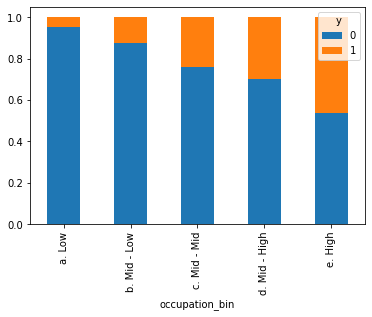

In [ ]:
#occupation bar
pd.crosstab(data['occupation_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

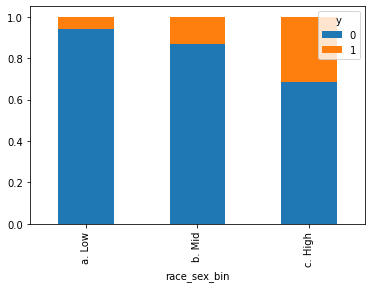

In [ ]:
#race and sex bin 
pd.crosstab(data['race_sex_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

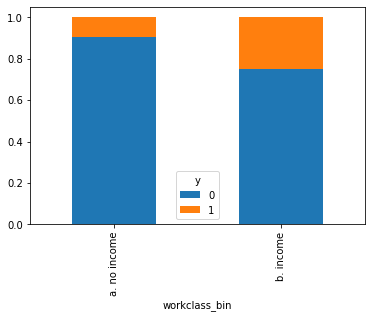

In [ ]:
#workclass_bin
pd.crosstab(data['workclass_bin'],data['y'],normalize='index').plot(kind='bar',stacked=True)

# 3 Build Decision Tree Models

In [ ]:
#Split the data between train and test
train=data[data['flag']=='train']
train
test=data[data['flag']=='test']
test

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [ ]:
#creating dummy variables for all bins 
x_train = pd.get_dummies(train[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train['y']
x_test=pd.get_dummies(test[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test['y']

In [ ]:
#creating the first tree
dtree = DecisionTreeClassifier(max_depth = 3, 
                               random_state = 101, 
                               max_features = None, 
                               min_samples_leaf = 15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

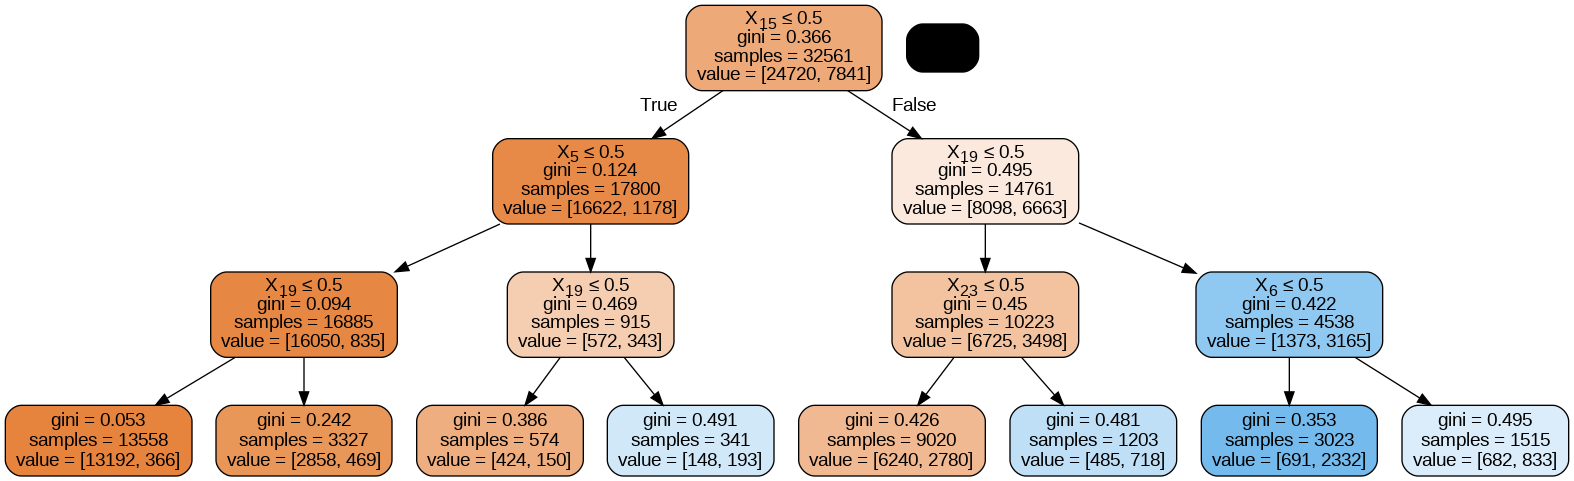

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 4 Evaluate Decision Tree Performance

In [ ]:
#Display the accuracy of model 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8259320680547878


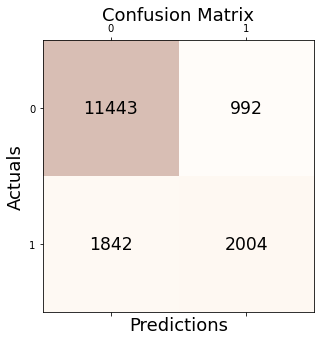

In [ ]:
#Confusion matrix to see the number of TP, TN, FP, FN predictions
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#create classification report to display precision, recall, f1 score 
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12435
           1       0.67      0.52      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



In [ ]:
#display AUC value 
print("AUC Value:",roc_auc_score(y_test,y_pred))

AUC Value: 0.7206430066611591


ROC Curve:


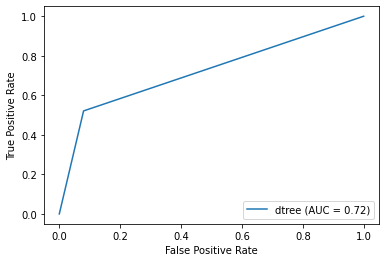

In [ ]:
#ROC curve viz
print("ROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
 
roc_auc = roc_auc_score(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="dtree")
display.plot()

# 5. Tune Decision Tree Performance

In [ ]:
#set dtree classifier to train the model and then predict y_test
dtree_test = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=100,random_state=110,max_features=None,criterion='gini')

#train model using training data
dtree_test.fit(x_train, y_train)

#predict using test data
y_pred1 = dtree_test.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred1))

print("accuracy:", accuracy_score(y_test, y_pred1))
print("recall score:",recall_score(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("f1 score:",f1_score(y_test,y_pred1))
print("AUC Value:",roc_auc_score(y_test,y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

accuracy: 0.8389533812419384
recall score: 0.5634425377015081
precision score: 0.6967845659163987
f1 score: 0.6230592294422083
AUC Value: 0.7438040995704966


Run 1 - Split Criteria (Entropy or Gini Impurity)



In [ ]:
#Using a for loop to see the accuracy of criteria option model
import numpy as np

results = []
criterion_options = ['entropy', 'gini']
for criterion in criterion_options:
    model = DecisionTreeClassifier(criterion=criterion,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(f"Accuracy {criterion}: {rounded_accuracy}")
print(results)

['Accuracy entropy: 0.835944', 'Accuracy gini: 0.835882']


Maximum Features



In [ ]:
#Using a for loop to see the accuracy of each maximum feature option model (and criterion with the highest accuracy
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.836312, 0.836742, 0.8349, 0.836558, 0.836497, 0.835391]


max_features: 0.3, accuracy: 0.836312
max_features: 0.4, accuracy: 0.836742
max_features: 0.5, accuracy: 0.8349
max_features: 0.6, accuracy: 0.836558
max_features: 0.7, accuracy: 0.836497
max_features: 0.8, accuracy: 0.835391


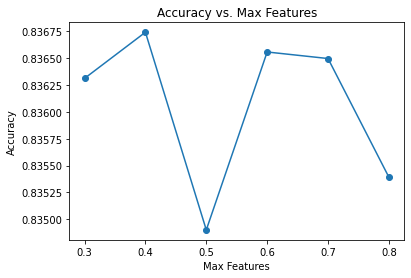

In [ ]:
#Using a for loop to iterate through each hyperparameter value and see accuracy score for each model
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
    print("max_features: {}, accuracy: {}".format(max_features, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(max_features_options, results, marker='o')
plt.title("Accuracy vs. Max Features")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.show()

Minimum Sample Leaf



In [53]:
#for loop to see the accuracy of each minimum sample leaf option model 
results = []
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.4, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.8382, 0.8393, 0.8374, 0.838, 0.8375, 0.8363, 0.8362, 0.8366]


min_samples_leaf: 5, accuracy: 0.8382
min_samples_leaf: 10, accuracy: 0.8393
min_samples_leaf: 15, accuracy: 0.8374
min_samples_leaf: 20, accuracy: 0.838
min_samples_leaf: 25, accuracy: 0.8375
min_samples_leaf: 30, accuracy: 0.8363
min_samples_leaf: 35, accuracy: 0.8362
min_samples_leaf: 40, accuracy: 0.8366


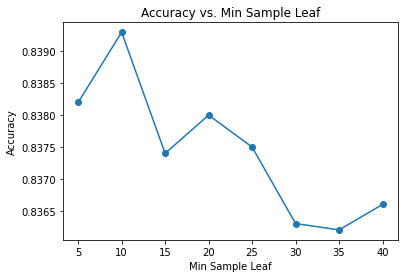

In [55]:
#Using a for loop to iterate through each hyperparameter value and see accuracy score for each model
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.4, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
    print("min_samples_leaf: {}, accuracy: {}".format(min_samples_leaf, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(min_samples_leaf_options, results, marker='o')
plt.title("Accuracy vs. Min Sample Leaf")
plt.xlabel("Min Sample Leaf")
plt.ylabel("Accuracy")
plt.show()

Maximum Depth



In [56]:
#for loop to see the accuracy of each maximum depth option model 
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=0.4, min_samples_leaf=10, max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.816596, 0.824642, 0.832197, 0.834715, 0.839383, 0.837049, 0.838523, 0.839383, 0.836558, 0.835391]


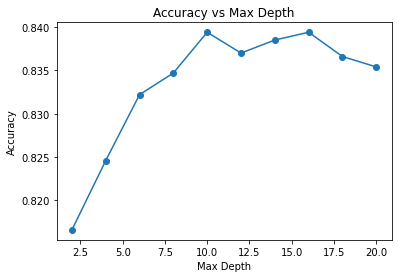

In [57]:
#For loop to iterate through each hyperparameter value and see accuracy score for each model
results = []
min_samples_leaf = 10
max_features = 0.4
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for max_depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, max_features=max_features, min_samples_leaf=min_samples_leaf, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)

#Creating a line graph to visualize the accuracy results
plt.plot(max_depth_options, results, marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Q3 - Decision Tree Hyper-parameter variation vs. performance



In [58]:
#For loop to evaluate the performance of the 1st decision tree using entropy and gini
criterion_options = ['entropy', 'gini']
results = []
for criterion in criterion_options:
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Criteria": criterion, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Criteria", inplace=True)
print(results_df)

          Accuracy  Precision   Recall  F1-Score
Criteria                                        
entropy   0.835944   0.780032  0.73896  0.755467
gini      0.835882   0.779849  0.73910  0.755504


In [59]:
#for loop to evaluate the performance of the 2nd decision tree using gini as the criterion 
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Accuracy": report["accuracy"], "Recall": report["macro avg"]["recall"], "Precision": report["macro avg"]["precision"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results, index=max_features_options)
print(results_df)

     Accuracy    Recall  Precision  F1-Score
0.3  0.836312  0.739022   0.780799  0.755760
0.4  0.836742  0.739304   0.781620  0.756222
0.5  0.834900  0.737648   0.778288  0.753989
0.6  0.836558  0.739901   0.780995  0.756434
0.7  0.836497  0.739681   0.780946  0.756266
0.8  0.835391  0.738688   0.778955  0.754926


In [60]:
#For loop to evaluate the performance of the 3rd decision tree using gini as the criterion,
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
max_features = 0.4
for min_samples_leaf in min_samples_leaf_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=max_features, min_samples_leaf=min_samples_leaf, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Min Sample Leaf": min_samples_leaf, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Min Sample Leaf", inplace=True)
print(results_df)

                 Accuracy  Precision    Recall  F1-Score
Min Sample Leaf                                         
5                0.838216   0.783845  0.741795  0.758677
10               0.839260   0.786889  0.740054  0.758424
15               0.837418   0.784029  0.737052  0.755393
20               0.838032   0.783812  0.740866  0.758020
25               0.837479   0.781674  0.743378  0.759043
30               0.836312   0.782156  0.735610  0.753782
35               0.836189   0.781118  0.737505  0.754801
40               0.836619   0.780944  0.740390  0.756755


In [62]:
#Using a for loop to evaluate the performance of the 4th decision tree using gini as the criteria,
#max feature option with the highest accuracy score (max feature of 0.7), min sample leaf with the highest accuracy
#score (min sample leaf of 20) and different max depth hyperparameter options: 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
#and creating a table with the results at the end
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
results = []
for max_depth in max_depth_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=0.4, min_samples_leaf=10, max_depth=max_depth, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({'Accuracy': report['accuracy'], 
                    'Recall': report['1']['recall'], 
                    'Precision': report['1']['precision'], 
                    'F1 Score': report['1']['f1-score']})
results_df = pd.DataFrame(results, index=max_depth_options)
results_df.index.name = 'Max Depth'
print(results_df)

           Accuracy    Recall  Precision  F1 Score
Max Depth                                         
2          0.816596  0.397816   0.695455  0.506120
4          0.824642  0.500000   0.673555  0.573944
6          0.832197  0.548362   0.679446  0.606906
8          0.834715  0.536661   0.694248  0.605367
10         0.839383  0.548622   0.705922  0.617410
12         0.837049  0.536141   0.703514  0.608529
14         0.838523  0.561362   0.696227  0.621563
16         0.839383  0.564483   0.697846  0.624120
18         0.836558  0.562142   0.688754  0.619041
20         0.835391  0.517421   0.707178  0.597598


# 6. Visualize Your Best Decision Tree

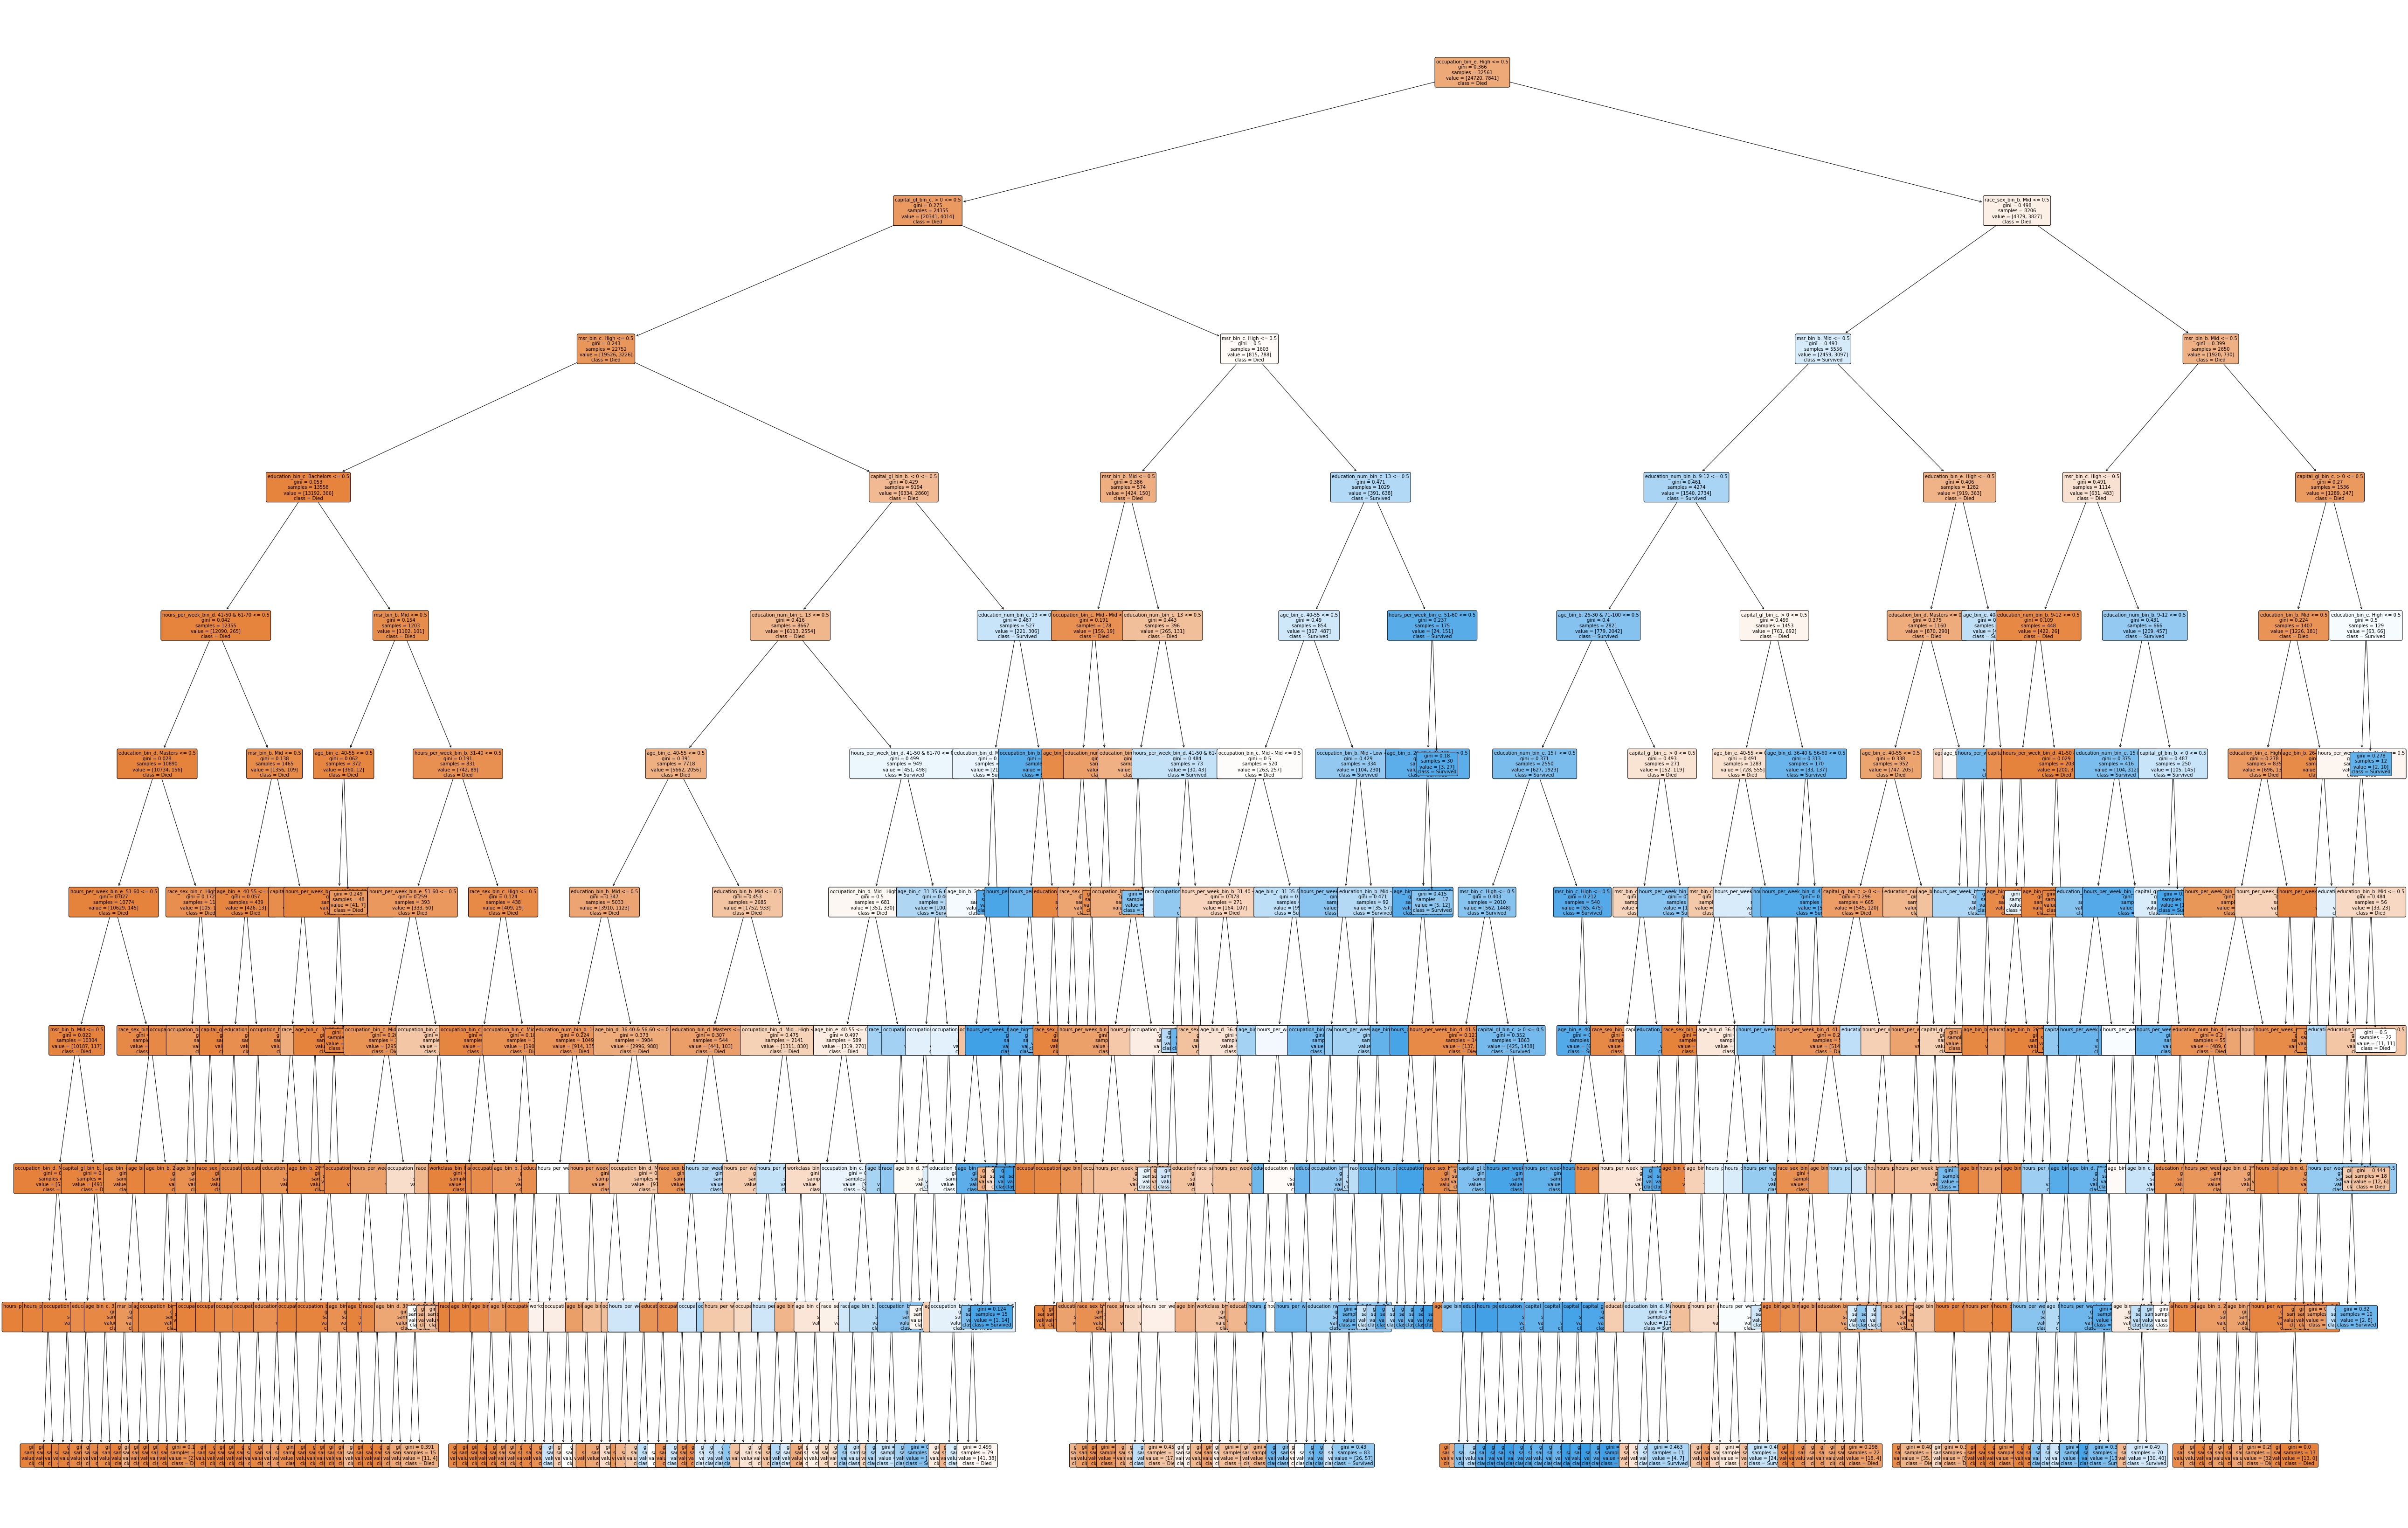

In [63]:
from sklearn.tree import plot_tree

best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.4, min_samples_leaf=10, max_depth=10, random_state=101)
best_dtree.fit(x_train, y_train)

plt.figure(figsize=(90, 60))
a = plot_tree(best_dtree, feature_names=list(x_train), class_names=['Died', 'Survived'],
              filled=True, rounded=True, fontsize=10)
plt.show()

Q4 - How long was your total run time to train the best model?


In [66]:
%%time
best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.4, min_samples_leaf=10,max_depth=10, random_state=101)
best_dtree.fit(x_train, y_train)
y_pred=best_dtree.predict(x_test)

CPU times: user 35.5 ms, sys: 0 ns, total: 35.5 ms
Wall time: 38.4 ms


38.4 MS

Q5 - Did you find the BEST TREE?



I have developed a decision tree model that performs well on this given dataset, and I have tuned its performance to achieve a slightly higher accuracy score than the original tree. However, it is important to note that the model I developed is not necessarily the best possible tree, as finding the truly "best" tree would require significant time and effort to experiment with hyperparameters. In fact, the concept of a single "best" tree is relative and subjective, as there may be numerous other trees developed by others that perform better than mine. While I believe my tree to be of high quality, it is possible that other models may outperform it.

Q6 - Write your observations from the visualization of the best tree.



The decision tree I developed appears to be overly complex, with numerous features and interactions that can make it challenging to interpret and extract meaningful insights. The tree is also quite cluttered, with many small and overlapping leaves that make it difficult to read the information contained within. It is possible that the tree contains a significant amount of redundancy, with multiple branches that are similar or identical. However, due to the complexity of the tree, it can be difficult to assess this accurately. I believe that the high level of complexity in the tree is largely due to the minimum sample leaf of 10, which requires each leaf node to have at least 10 samples, as well as the maximum depth of 10 as well. Additionally, it is possible that the model is overfitting the training data, which may explain the complex and convoluted structure of the tree.

Q7 - Will this Tree “overfit”?

There is a high likelihood that this tree will overfit the training data, due to a number of factors. First, the max_depth hyperparameter has been set to 10, which may result in overfitting. Although this value provided the highest accuracy during model tuning, it is important to recognize that increasing the maximum depth can lead to overfitting by allowing the model to become too complex. Additionally, many of the leaves at the bottom of the tree have a gini score of around 0.5, indicating that they may be prone to impurity and potentially cause overfitting. This suggests that the model is not yet optimal, and further tuning may be necessary to achieve a more accurate and reliable decision tree model.

# 8. Prediction using your “trained” Decision Tree Model

In [84]:
#getting the original bin names to convert individual data
for i in range(len(data.columns)-1):
  print(data.columns[i])
  print(data.iloc[:, i].unique())
  print('')

hours_per_week_bin
['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']

occupation_bin
['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']

msr_bin
['b. Mid' 'c. High' 'a. Low']

capital_gl_bin
['c. > 0' 'a. = 0' 'b. < 0']

race_sex_bin
['c. High' 'b. Mid' 'a. Low']

education_num_bin
['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']

education_bin
['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']

workclass_bin
['b. income' 'a. no income']

age_bin
['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']

flag
['train' 'test']



In [85]:
#creating a dataframe with individual_data
new_individual = pd.DataFrame(x_test.iloc[0, :]).transpose().reset_index(drop = True)
new_individual['hours_per_week_bin'] = 'd. 41-50 & 61-70'
new_individual['occupation_bin'] = 'b. Mid - Low'
new_individual['msr_bin'] = 'c. High'
new_individual['capital_gl_bin'] = 'c. > 0'
new_individual['race_sex_bin'] = 'b. Mid'
new_individual['education_num_bin'] = 'b. 9-12'
new_individual['education_bin'] = 'e. High'
new_individual['workclass_bin'] = 'b. income'
new_individual['age_bin'] = 'd. 36-40 & 56-60'
new_individual

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_a. 0-30,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,d. 41-50 & 61-70,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,e. High,b. income,d. 36-40 & 56-60


In [104]:
new_df = pd.DataFrame(new_individual, index=[16281]) 

In [105]:
new_df

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_a. 0-30,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
16281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Appending a single row df called "new_row" with the new individual data to the x_test df
x_test = x_test.append(new_df, ignore_index=True)

In [102]:
x_test

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_a. 0-30,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16279,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16280,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16281,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting an error here to predict the new individual.

In [115]:
#Predicting the class label for the new individual 
#best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20,max_depth=14, random_state=101)
#best_dtree.fit(x_train, y_train)
#y_pred = best_dtree.predict(x_test.iloc[[16281]])
#print(y_pred)

Q8 - What is the probability that your prediction for this person is correct?

In [110]:
#A predicted class label of 1 corresponds to an income category of >50K, while a predicted class label of 0 corresponds to an income category of <=50K
if y_pred[0] == 0:
  print('Class label 0 - The predicted annual income category is < $50,000')
elif y_pred[0] == 1:
  print('Class label 1 - The predicted annual income category is > $50,000')
else:
  print('Not applicable')

Class label 0 - The predicted annual income category is < $50,000


In [116]:
#The probability would work if the error above was working
#prob=best_dtree.predict_proba(x_test.iloc[[16281]])
#print('Probability: ', prob)